This notebook explores the differences in the trace data regarding the attributes for the different kind of traces (boot_delete, image_create_delete, network_create_delete)

In [1]:
%matplotlib inline
import os
import sys
sys.path.append("../../src")
import trace_information as ti
import json
import matplotlib.pyplot as plt
from features import trace_pre_processing as tpp
from collections import Counter

In [2]:
# reads all the paths of json files inside the path and returns them as array
def get_all_traces_from_path(path):
    return [os.path.join(dp, f) for dp, dn, filenames in os.walk(path) for f in filenames if os.path.splitext(f)[1] == '.json']

# iterates over all the passed paths and computes list of list representations returning them as array
def get_traces_as_list_of_lists_representation(paths):
    representations = []
    for p in paths:
        trace_f = open(p)
        trace_j = json.load(trace_f)
        representations.append(tpp.get_list(trace_j, lambda x : [])) # no need to extract any attributes
    return representations

In [3]:
NUMBER_OF_BINS_HISTOGRAMM = 100 

# this method prints the distributions of the sequential data next to the concurrent data
# data needs to be a dict with the keys sequential and concurrent
# these keys point to another dict containing the sequential/ concurrent data that gets plotted
# that dict has the form of 'title of figure' -> data
# data gets plotted as a histogram
def plot_multiple_distributions(data, title):
    n_subplots = len(data['sequential'])
    fig, axs = plt.subplots(n_subplots, 2, figsize=(15,10))
    fig.suptitle(title)
    fig.tight_layout(rect=[0, 0.03, 1, 0.98])
    i = 0
    j = 0
    sequential_data = data['sequential']
    concurrent_data = data['concurrent']
    for k, v in sequential_data.items():
        axs[i][j].hist(v, bins=NUMBER_OF_BINS_HISTOGRAMM)
        axs[i][j].set_title(k)
        i += 1
    i = 0
    j = 1
    for k, v in concurrent_data.items():
        axs[i][j].hist(v, bins=NUMBER_OF_BINS_HISTOGRAMM)
        axs[i][j].set_title(k)
        i += 1

In [4]:
# returns an array of json representations for the passed file paths
def create_json_from_path(trace_paths):
    trace_representations = []
    for path in trace_paths:
        with open(path) as trace_file:
            trace_representations.append(json.load(trace_file))
            
    return trace_representations

# Trace representations categorized by type of trace and sequential/ concurrent
sequential_boot_delete_trace_paths = get_all_traces_from_path('../../data/raw/sequential_data/traces/boot_delete')
sequential_boot_delete_trace_jsons = create_json_from_path(sequential_boot_delete_trace_paths)
sequential_image_create_delete_trace_paths = get_all_traces_from_path('../../data/raw/sequential_data/traces/image_create_delete')
sequential_image_create_delete_trace_jsons = create_json_from_path(sequential_image_create_delete_trace_paths)
sequential_network_create_delete_trace_paths = get_all_traces_from_path('../../data/raw/sequential_data/traces/network_create_delete')
sequential_network_create_delete_trace_jsons = create_json_from_path(sequential_network_create_delete_trace_paths)

concurrent_boot_delete_trace_paths = get_all_traces_from_path('../../data/raw/concurrent_data/traces/boot_delete')
concurrent_boot_delete_trace_jsons = create_json_from_path(concurrent_boot_delete_trace_paths)
concurrent_image_create_delete_trace_paths = get_all_traces_from_path('../../data/raw/concurrent_data/traces/image_create_delete')
concurrent_image_create_delete_trace_jsons = create_json_from_path(concurrent_image_create_delete_trace_paths)
concurrent_network_create_delete_trace_paths = get_all_traces_from_path('../../data/raw/concurrent_data/traces/network_create_delete')
concurrent_network_create_delete_trace_jsons = create_json_from_path(concurrent_network_create_delete_trace_paths)

In [5]:
# plot distributions of sequential next to concurrent traces
# data is collected for each category: boot_delete, image_create_delete, network_create_delete
# data is collected from json_traces using the collect_data_func
# title is title of the plot
def plot_statistics_about_sequential_and_concurrent_data(collect_data_func, title):
    data_sequential_boot_delete = collect_data_func(sequential_boot_delete_trace_jsons)
    data_sequential_image_create_delete = collect_data_func(sequential_image_create_delete_trace_jsons)
    data_sequential_network_create_delete = collect_data_func(sequential_network_create_delete_trace_jsons)
    data_sequential_total = data_sequential_boot_delete + data_sequential_image_create_delete + data_sequential_network_create_delete

    data_concurrent_boot_delete = collect_data_func(concurrent_boot_delete_trace_jsons)
    data_concurrent_image_create_delete = collect_data_func(concurrent_image_create_delete_trace_jsons)
    data_concurrent_network_create_delete = collect_data_func(concurrent_network_create_delete_trace_jsons)
    data_concurrent_total = data_concurrent_boot_delete + data_concurrent_image_create_delete + data_concurrent_network_create_delete

    sequential_data = {
     'sequential' : data_sequential_total,
     'sequential/boot_delete' : data_sequential_boot_delete,
     'sequential/image_create_delete' : data_sequential_image_create_delete,
     'sequential/network_create_delete' : data_sequential_network_create_delete
    }
    concurrent_data = {
    'concurrent' : data_concurrent_total,
    'concurrent/boot_delete' : data_concurrent_boot_delete,
    'concurrent/image_create_delete' : data_concurrent_image_create_delete,
    'concurrent/network_create_delete' : data_concurrent_network_create_delete
    }
    plot_multiple_distributions({'sequential' : sequential_data, 'concurrent' : concurrent_data}, title)

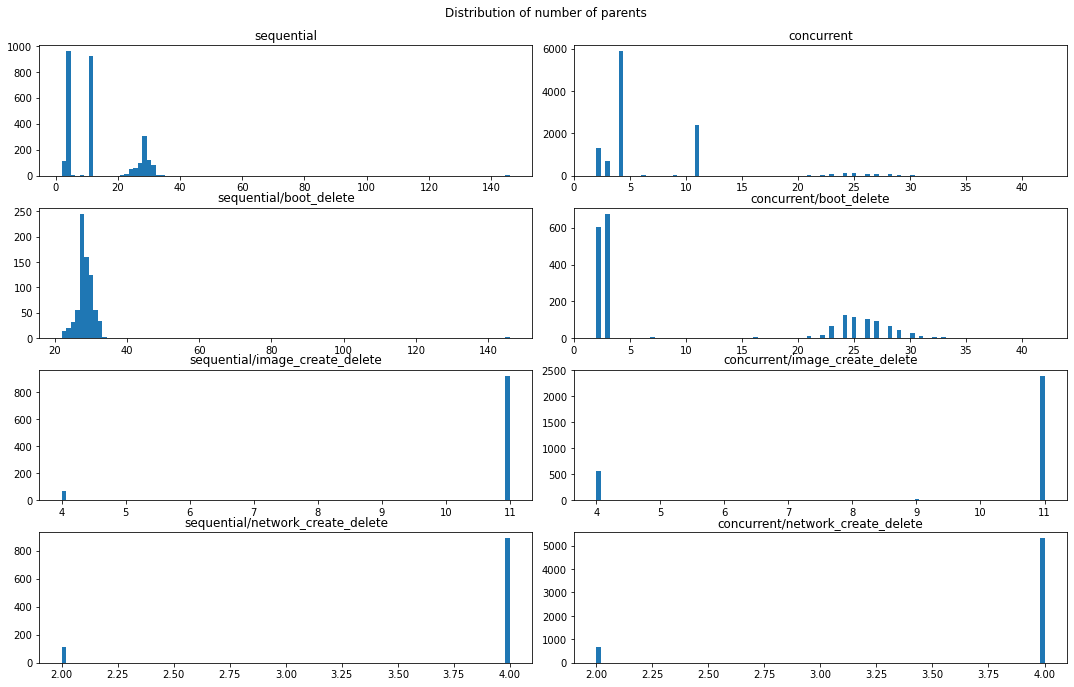

In [6]:
# collect number of parents for the passed jsons representing the traces
def get_number_of_parents(trace_jsons):
    number_of_parents = []
    
    for trace in trace_jsons:
        number_of_parents.append(ti.get_number_of_parents(trace))
        
    return number_of_parents

plot_statistics_about_sequential_and_concurrent_data(get_number_of_parents, 'Distribution of number of parents')

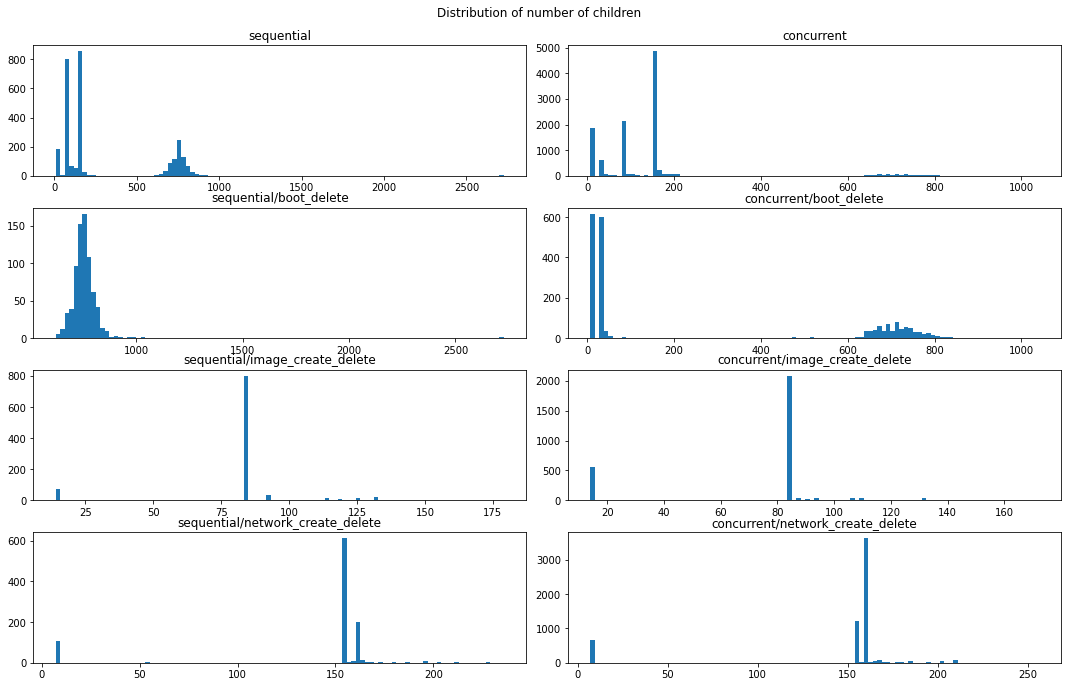

In [7]:
# collect number of children for the passed jsons representing the traces
def get_number_of_children(trace_jsons):
    number_of_children = []
    
    for trace in trace_jsons:
        number_of_children.append(ti.get_number_of_children(trace))
        
    return number_of_children

plot_statistics_about_sequential_and_concurrent_data(get_number_of_children, 'Distribution of number of children')

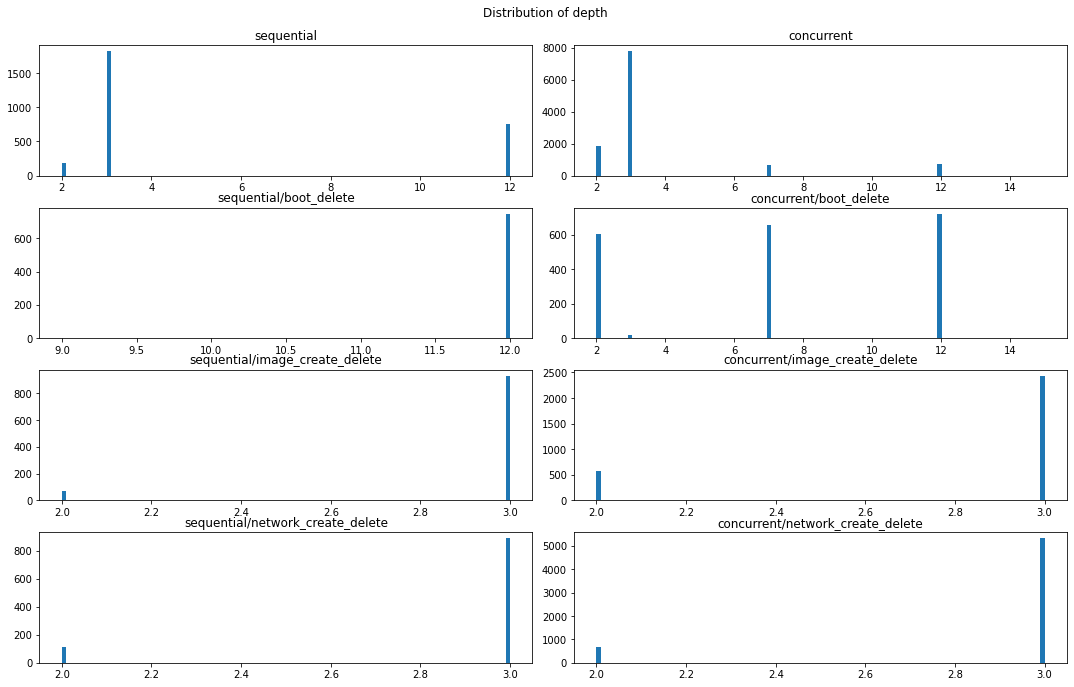

In [8]:
# collect depths for the passed jsons representing the traces
def get_depths(trace_jsons):
    deepest_levels = []
    
    for trace in trace_jsons:
        deepest_levels.append(ti.get_depth(trace))
        
    return deepest_levels

plot_statistics_about_sequential_and_concurrent_data(get_depths, 'Distribution of depth')

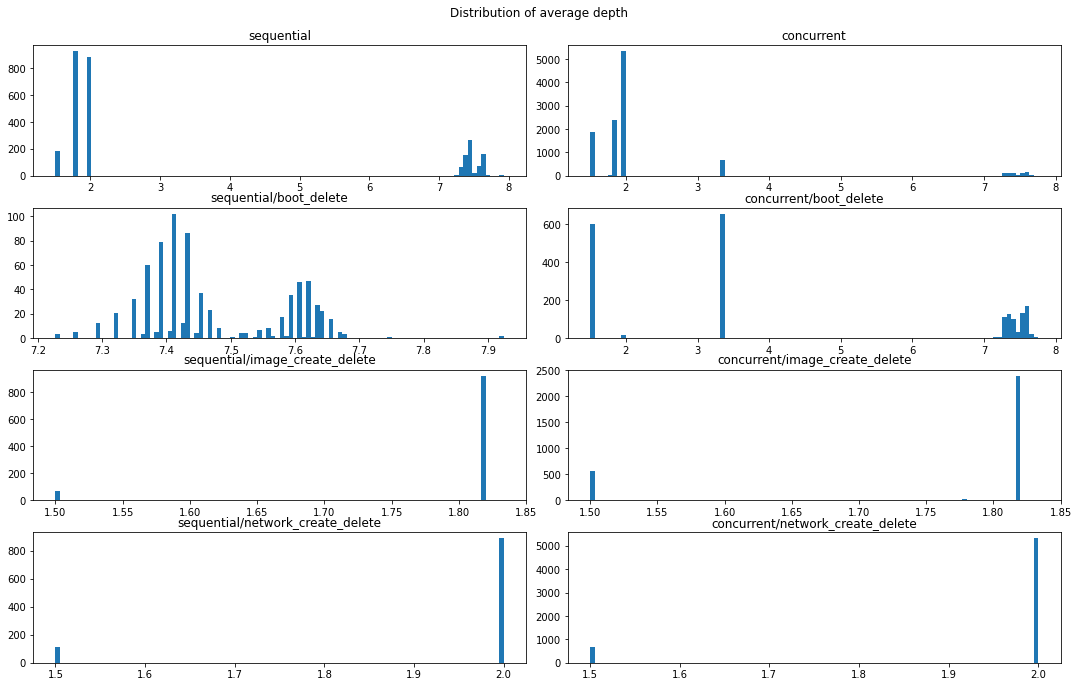

In [9]:
# collect average depths for the passed jsons representing the traces
def get_average_depths(trace_jsons):
    average_depth = []
    
    for trace in trace_jsons:
        average_depth.append(ti.get_average_depth(trace))
        
    return average_depth

plot_statistics_about_sequential_and_concurrent_data(get_average_depths, 'Distribution of average depth')

In [10]:
# counts the different unique elements in the passed data and returns the count and labels
def get_sizes_and_labels(data):
    counts = list(Counter(data).items())
    sizes = []
    labels = []
    for c in counts:
        labels.append(c[0])
        sizes.append(c[1])
    
    return sizes, labels

# plots pie charts for sequential data next to pie charts for concurrent data
# data is a dictionary with two keys 'sequential' and 'concurrent'
# these keys point to another dictionary containing the data for each subplot, where the key is the title of the subplot and the value is the data thats being plotted
def plot_pie_comparisions(data, title):
    n_subplots = len(data['sequential'])
    fig, axs = plt.subplots(n_subplots, 2, figsize=(15,15))
    fig.suptitle(title)
    fig.tight_layout(rect=[0, 0.03, 1, 0.98])
    i = 0
    j = 0
    sequential_data = data['sequential']
    concurrent_data = data['concurrent']
    for k, v in sequential_data.items():
        sizes, labels = get_sizes_and_labels(v)
        wedges, _ = axs[i][j].pie(sizes)
        axs[i][j].legend(wedges, labels, loc='center left')
        axs[i][j].axis('equal')
        axs[i][j].set_title(k)
        i += 1
    i = 0
    j = 1
    for k, v in concurrent_data.items():
        sizes, labels = get_sizes_and_labels(v)
        wedges, _ = axs[i][j].pie(sizes)
        axs[i][j].legend(wedges, labels, loc='center left')
        axs[i][j].axis('equal')
        axs[i][j].set_title(k)
        i += 1

# function that collects the data thats being plotted for each category of traces (boot_delete/ image_create_delete/ network_create_delete) and plots the pie chart for sequential and concurrent traces next to each other
def plot_pie_charts_about_sequential_and_concurrent_data(collect_data_func, title):
    data_sequential_boot_delete = collect_data_func(sequential_boot_delete_trace_jsons)
    data_sequential_image_create_delete = collect_data_func(sequential_image_create_delete_trace_jsons)
    data_sequential_network_create_delete = collect_data_func(sequential_network_create_delete_trace_jsons)

    data_concurrent_boot_delete = collect_data_func(concurrent_boot_delete_trace_jsons)
    data_concurrent_image_create_delete = collect_data_func(concurrent_image_create_delete_trace_jsons)
    data_concurrent_network_create_delete = collect_data_func(concurrent_network_create_delete_trace_jsons)
    sequential_data = {
     'sequential/boot_delete' : data_sequential_boot_delete,
     'sequential/image_create_delete' : data_sequential_image_create_delete,
     'sequential/network_create_delete' : data_sequential_network_create_delete
    }
    concurrent_data = {
    'concurrent/boot_delete' : data_concurrent_boot_delete,
    'concurrent/image_create_delete' : data_concurrent_image_create_delete,
    'concurrent/network_create_delete' : data_concurrent_network_create_delete
    }
    plot_pie_comparisions({'sequential' : sequential_data, 'concurrent' : concurrent_data}, title)

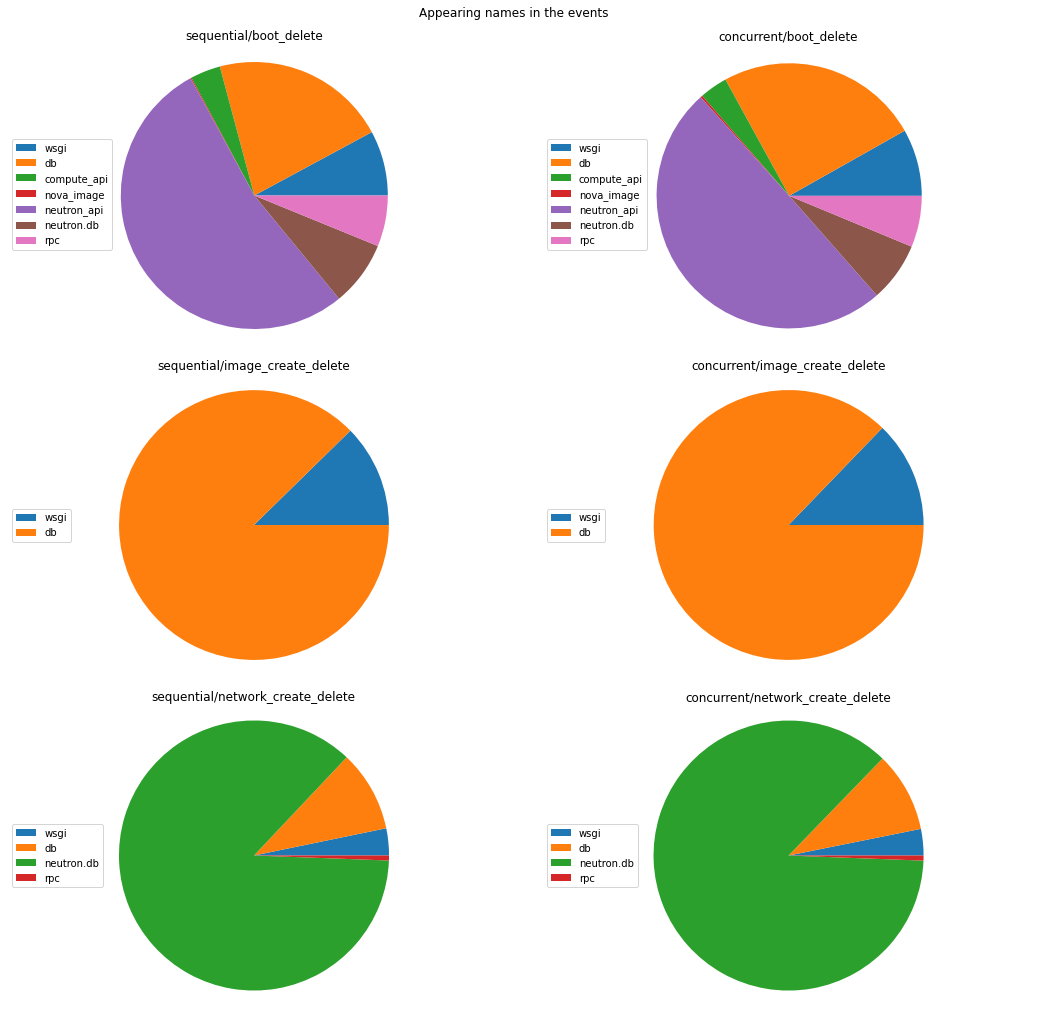

In [11]:
# collect the name field for each event for every trace passed in the array
def get_names_for_traces(trace_jsons):
    names = []
    for trace in trace_jsons:
        names.extend(tpp.get_flat_list(trace, lambda x: [x['info']['name']]))

    return names

plot_pie_charts_about_sequential_and_concurrent_data(get_names_for_traces, 'Appearing names in the events')

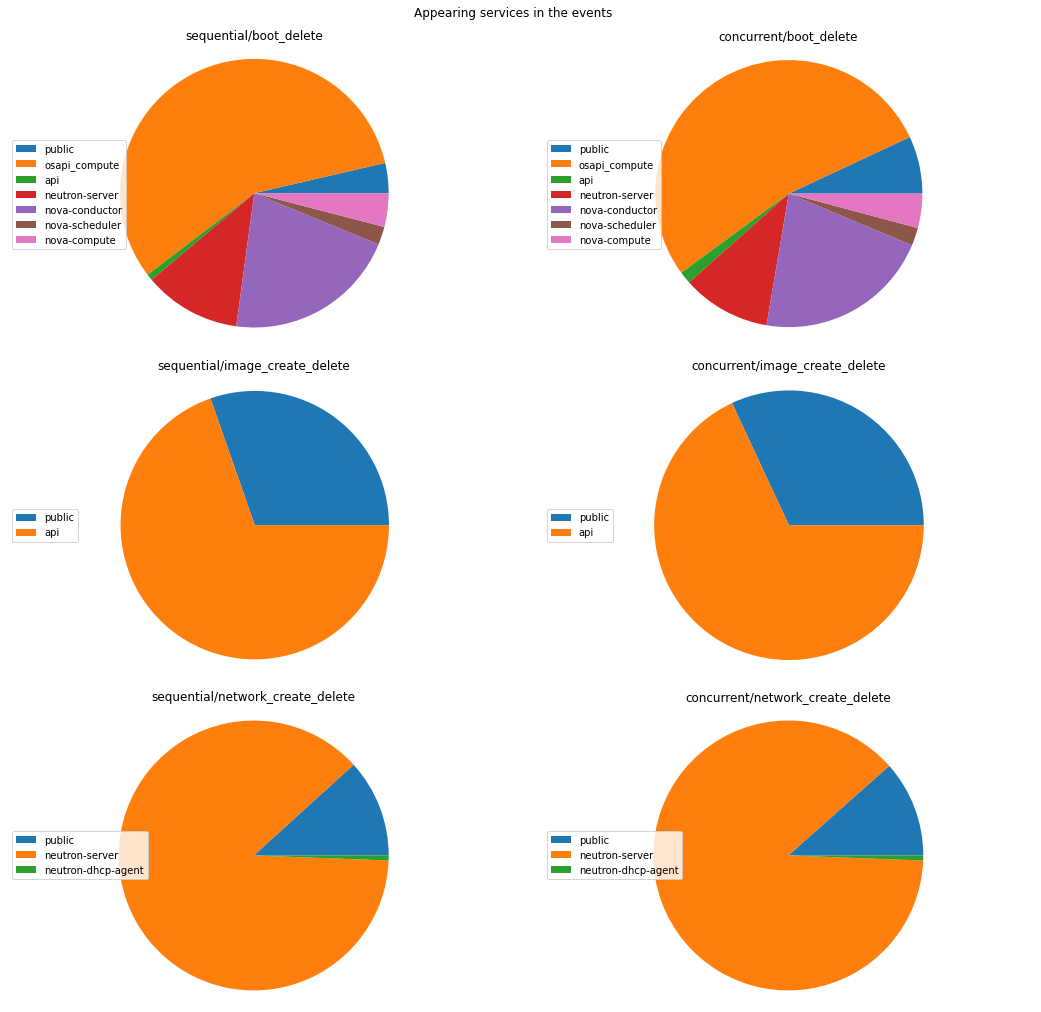

In [12]:
# collect the service field for each event for every trace passed in the array
def get_services_for_traces(trace_jsons):
    services = []
    for trace in trace_jsons:
        services.extend(tpp.get_flat_list(trace, lambda x: [x['info']['service']]))

    return services

plot_pie_charts_about_sequential_and_concurrent_data(get_services_for_traces, 'Appearing services in the events')

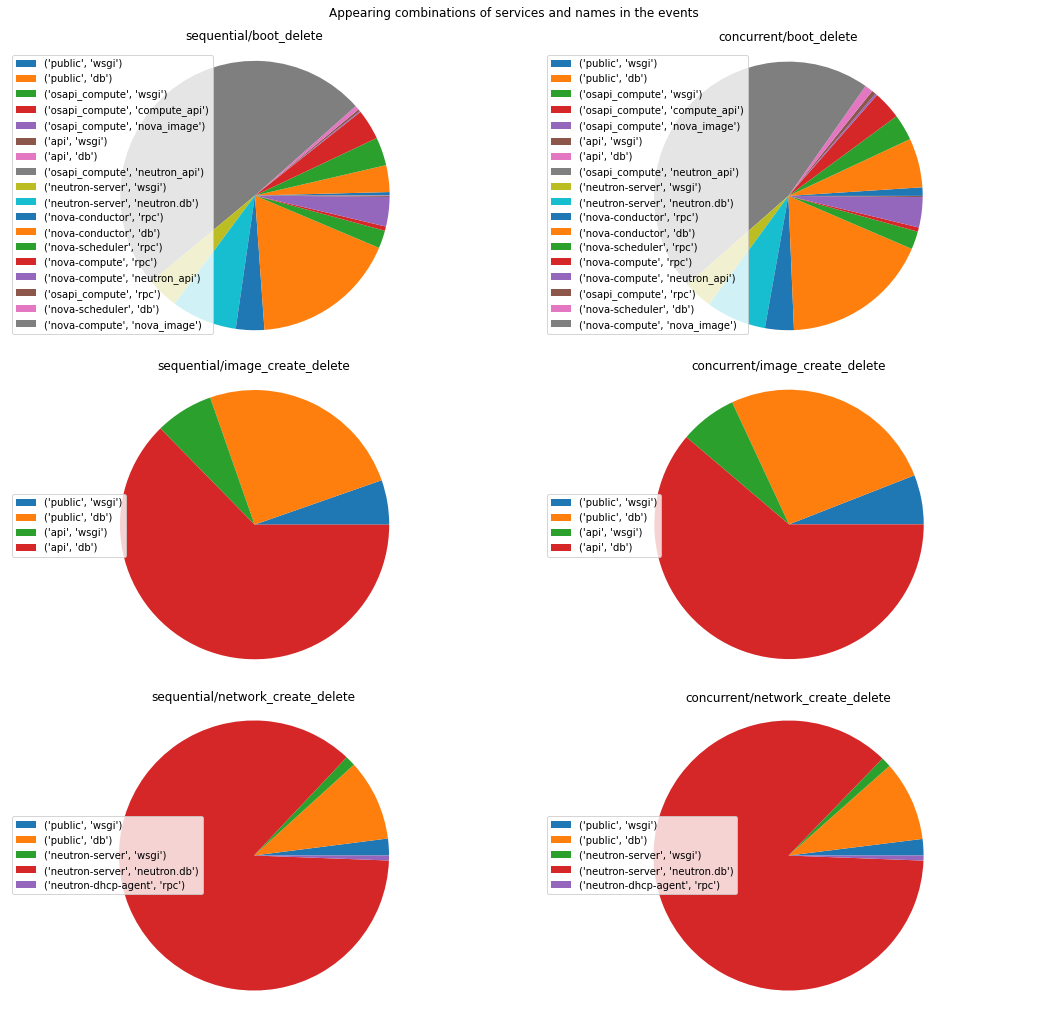

In [13]:
# collect the combination of service and name field for each event for every trace passed in the array
def get_services_and_names_for_traces(trace_jsons):
    services_and_names = []
    for trace in trace_jsons:
        services_and_names.extend(tpp.get_flat_list(trace, lambda x: [(x['info']['service'], x['info']['name'])]))

    return services_and_names

plot_pie_charts_about_sequential_and_concurrent_data(get_services_and_names_for_traces, 'Appearing combinations of services and names in the events')